## Movie Genre Prediction Using Multi Label Image Classification 

### Members:
Adithya Nair    -  AM.EN.U4CSE19103  
Akshay Hari     -  AM.EN.U4CSE19104  
Sreejith K Pai  -  AM.EN.U4CSE19153  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import torch
import torchvision.transforms as transforms
import torchvision
 
from torch.utils.data import DataLoader,Dataset

from sklearn.model_selection import train_test_split
from tqdm import tqdm

### Data Visualization

In [3]:
df = pd.read_csv('train.csv')
df.shape

(7254, 27)

Movie Poster Dataset: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

Kaggle link: https://www.kaggle.com/raman77768/movie-classifier

In [4]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Understanding The Dataset

In [5]:
#------------------------------------------------------------------TEST------------------------------------------------------

test = df.drop(['Id', 'Genre'], axis=1)
print(test)

d = {}

i = 0
for gen in test.columns:

  d[i] = gen
  i+=1

#print(d)

print(len(test.columns))

for i in range(len(test.columns)):
  if(test[d[i]][4] == 1):
    print(d[i])

#------------------------------------------------------------------TEST------------------------------------------------------

      Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          0          0          0          0       1      0            0   
1          0          0          0          0       0      0            0   
2          0          0          0          0       1      0            0   
3          0          0          0          0       0      0            0   
4          1          1          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
7249       1          0          0          0       0      1            0   
7250       0          0          1          0       1      0            0   
7251       0          0          0          0       1      0            0   
7252       0          0          0          0       0      0            1   
7253       0          0          1          0       0      0            0   

      Drama  Family  Fantasy  ...  N/A  News  Reality-TV  Romance  Sci-Fi  

### Data Preprocessing

In [6]:
img_folder = 'Images/'

In [7]:
class ImageDataset(Dataset):
  
  def __init__(self,csv,img_folder,transform):
    self.csv=csv
    self.transform=transform
    self.img_folder=img_folder
    
    self.image_names=self.csv[:]['Id']
    self.labels=np.array(self.csv.drop(['Id', 'Genre'], axis=1))
  
  def __len__(self):
    return len(self.image_names)

  def __getitem__(self,index):
    
    image=cv2.imread(self.img_folder+self.image_names.iloc[index]+'.jpg')
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    image=self.transform(image)
    targets=self.labels[index]

    return (image,targets)

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.25)

In [9]:
print(train_set)

             Id                                Genre  Action  Adventure  \
3471  tt0180679                ['Comedy', 'Fantasy']       0          0   
5029  tt0455824    ['Adventure', 'Drama', 'Romance']       0          1   
3612  tt0293815                  ['Comedy', 'Drama']       0          0   
2192  tt0113849       ['Comedy', 'Drama', 'Romance']       0          0   
6042  tt1948150         ['Action', 'Crime', 'Drama']       1          0   
...         ...                                  ...     ...        ...   
7049  tt2381335                      ['Documentary']       0          0   
233   tt0087730                            ['Drama']       0          0   
6387  tt2062645  ['Documentary', 'History', 'Music']       0          0   
2682  tt0120787       ['Crime', 'Drama', 'Thriller']       0          0   
2129  tt0112606                           ['Comedy']       0          0   

      Animation  Biography  Comedy  Crime  Documentary  Drama  ...  N/A  News  \
3471          0   

In [10]:
train_transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((350, 350)),
                transforms.ToTensor()])

test_transform =transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((350, 350)),
                transforms.ToTensor()])

train_dataset=ImageDataset(train_set,img_folder,train_transform)
test_dataset=ImageDataset(test_set,img_folder,test_transform)

img,labels = train_dataset.__getitem__(0)  #FOR PREVIEW - 2119 in TEST_DATASET(may change depending on splitting)

print(img.shape, labels)
img

torch.Size([3, 350, 350]) [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9843, 0.9882, 0.9882],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9843, 0.9882, 0.9882],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.

In [11]:
df[2119:2120][:]

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2119,tt0113729,"['Drama', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [12]:
print(d)

{0: 'Action', 1: 'Adventure', 2: 'Animation', 3: 'Biography', 4: 'Comedy', 5: 'Crime', 6: 'Documentary', 7: 'Drama', 8: 'Family', 9: 'Fantasy', 10: 'History', 11: 'Horror', 12: 'Music', 13: 'Musical', 14: 'Mystery', 15: 'N/A', 16: 'News', 17: 'Reality-TV', 18: 'Romance', 19: 'Sci-Fi', 20: 'Short', 21: 'Sport', 22: 'Thriller', 23: 'War', 24: 'Western'}


Comedy
Fantasy


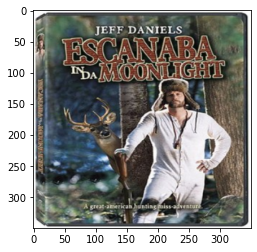

In [13]:
def show_example(img, label,d):

    for index in range(len(labels)):

      if(labels[index]==1):
        print(d[index])
        
    plt.imshow(img.permute(1, 2, 0))
  
show_example(img,labels,d)

In [14]:
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset, 
    batch_size=32,
    shuffle=True
)

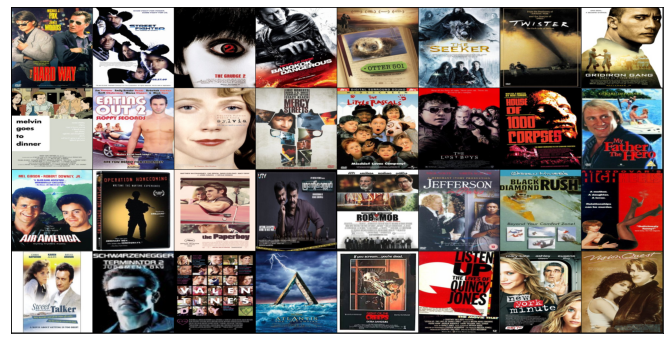

In [15]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break
        
show_batch(train_dataloader)

### Implementing The Model

In [16]:
import torch.nn as nn

import torch.nn.functional as F

In [17]:
def accuracy(outputs, labels,correct):

    #print("NN OUTPUTS:",outputs)
    
    # Get top 3 predicted values - convert to 1'a & 0's
    
    kvals, kidx = outputs.topk(3, dim=1)
    outputs.zero_()
    outputs[torch.arange(outputs.size(0))[:, None], kidx] = 1
    
    #print("PREDICTED OUTPUTS: ",outputs)
    #print("LABELS :", labels)
    
    correct += (outputs == labels).sum()
    #print("CORRECT PRED: ", correct)
    #print("TOTAL LENGTH",len(outputs))
    
    return torch.tensor(torch.sum(outputs == labels).item() / len(outputs))

In [40]:
class Base(nn.Module):
    
    def training_step(self, batch,criterion):
        images, labels = batch
        #print("IMAGES",images) 
        out = self(images)
        #print("PREDICTED: ",out)
        #print("LABEL: ",labels)
        # Generate predictions
        loss = criterion(out, labels.float()) # Calculate loss
        return loss

    def validation_step(self, batch):
        
        correct = 0    
        
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = criterion(out, labels.float())   # Calculate loss
        acc = accuracy(out, labels.float(),correct)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
      
    def validation_epoch_end(self, outputs):
        
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
  
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], (result['val_acc'])))

In [41]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

### Training The Model

In [42]:
criterion = torch.nn.BCELoss()

def fit(epochs, lr, model, train_loader,test_loader,opt_func=torch.optim.SGD):

    history = []
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            
            loss = model.training_step(batch,criterion)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print("TRAIN LOSS: ",loss.item())
        
        # Validation phase
        #result = evaluate(model, val_loader)
        #model.epoch_end(epoch, result)
        #history.append(result)

        result = evaluate(model, test_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [43]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [44]:
device = get_default_device()
device

device(type='cpu')

In [45]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [46]:
train_loader = DeviceDataLoader(train_dataloader, device)
test_loader = DeviceDataLoader(test_dataloader, device)

### Feed Forward Model

In [47]:
input_size = 3*350*350
output_size = 25
hidden_size = [512,1024,256]

In [48]:
class FirstModel(Base):

    def __init__(self):

        super().__init__()
         # input layer
        self.linear1 = nn.Linear(input_size, hidden_size[0])
         # hidden layer
        self.linear2 = nn.Linear(hidden_size[0], hidden_size[1])    
        self.linear3 = nn.Linear(hidden_size[1], hidden_size[2])  
        #self.linear4 = nn.Linear(hidden_size[2], hidden_size[3])  
        # output layer
        self.linear4 = nn.Linear(hidden_size[2], output_size) #???
        
    def forward(self, xb):

        # Flatten images into vectors
        out = xb.view(xb.size(0), -1).requires_grad_()
        # Get intermediate outputs using hidden layer
        out = self.linear1(out)
        # Apply layers & activation function
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        #out = self.linear4(out)
        #out = F.relu(out)
        # Get predictions using output layer
        out = self.linear4(out)

        y_pred = torch.sigmoid(out)

        return y_pred

In [49]:
model = to_device(FirstModel(), device)

In [50]:
history = []
history += fit(5, .05, model, train_loader,test_loader)


TRAIN LOSS:  0.2542370557785034
Epoch [0], val_loss: 0.2555, val_acc: 21.9061
TRAIN LOSS:  0.2609313726425171
Epoch [1], val_loss: 0.2506, val_acc: 21.9506
TRAIN LOSS:  0.2470485270023346
Epoch [2], val_loss: 0.2505, val_acc: 21.9108
TRAIN LOSS:  0.23429888486862183
Epoch [3], val_loss: 0.2481, val_acc: 21.9342
TRAIN LOSS:  0.24423915147781372
Epoch [4], val_loss: 0.2467, val_acc: 21.9310


### Prediction Using New Data

PREDICTED:

Comedy
Drama
Romance


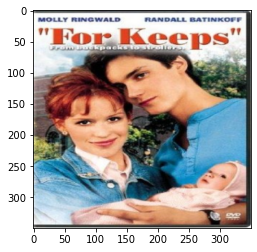

In [62]:
def predict_image(img, model):
    
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    
    # Get predictions from model
    yb = model(xb)
    
    #print("MODEL OUTPUTS:",yb)
    
    # Pick index with highest probability
    #_, preds  = torch.max(yb, dim=1)
    
    
    # Get top 3 predicted values - convert to 1'a & 0's
    
    kvals, kidx = yb.topk(3, dim=1)
    yb.zero_()
    yb[torch.arange(yb.size(0))[:, None], kidx] = 1
    
    
    #print("PREDICTIONS: ",yb)
    
    final = yb.cpu().detach().numpy()
    
    #print("FINAL: ",final)
    
    # Retrieve the class label
    return final

#d[preds[0].item()]

img, label = test_dataset[11]

#print("LABEL: ",label)

plt.imshow(img.permute(1, 2, 0))
result = predict_image(img, model)

#print("RESULT: ",result)


print("PREDICTED:\n")

for i in result:
    for j in range(len(i)):
        
        if(i[j] == 1):
        
            print(d[j])